<a href="https://colab.research.google.com/github/dpramanik92/linRegOpt/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
print(tf.__version__)

2.7.0


In [3]:
def func(x,y):
    return x**2+y**2

In [4]:
x = np.random.random(5000)*10
y = np.random.random(5000)*10


In [27]:
z = func(x,y)
xx = x*x
yy = y*y


In [31]:
train_data = np.array([x,y,xx/np.max(xx),yy/np.max(yy)]).T

In [32]:
train_data.shape

(5000, 4)

In [33]:
train_labels = []
for i in range(0,5000):
    if(z[i]<=25):
        train_labels.append(0)
    else:
        train_labels.append(1)
        

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=None),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),


    tf.keras.layers.Dense(1)
])

In [35]:
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [36]:
%%time
history = model.fit(
    np.array(train_data),
    np.array(train_labels),
    epochs=500,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.3,
    shuffle=True
)

Epoch 1/500
110/110 [==============================] - 1s 5ms/step - loss: 0.0744 - accuracy: 0.9471 - val_loss: 0.0683 - val_accuracy: 0.9720
Epoch 2/500
110/110 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9720 - val_loss: 0.0668 - val_accuracy: 0.9687
Epoch 3/500
110/110 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9740 - val_loss: 0.0645 - val_accuracy: 0.9733
Epoch 4/500
110/110 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9746 - val_loss: 0.0612 - val_accuracy: 0.9780
Epoch 5/500
110/110 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9754 - val_loss: 0.0585 - val_accuracy: 0.9740
Epoch 6/500
110/110 [==============================] - 0s 2ms/step - loss: 0.0535 - accuracy: 0.9757 - val_loss: 0.0551 - val_accuracy: 0.9780
Epoch 7/500
110/110 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9783 - val_loss: 0.0518 - val_accuracy: 0.9793

In [37]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
 # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Chi2]')
  plt.legend()
  plt.grid(True)

def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
 # plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Chi2]')
  plt.legend()
  plt.grid(True)

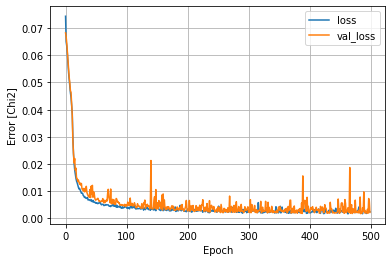

In [38]:
plot_loss(history)

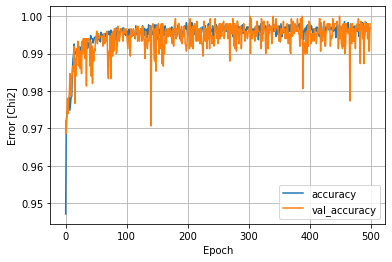

In [39]:
plot_accuracy(history)

In [40]:
x1 = np.random.random(5000)*10
y1 = np.random.random(5000)*10
xx1 = x1*x1
yy1 = y1*y1
test_data = np.array([x1,y1,xx1/np.max(xx1),yy1/np.max(yy1)]).T
z1 = func(x1,y1)

test_labels = []
for i in range(0,5000):
    if(z1[i]<=25):
        test_labels.append(0)
    else:
        test_labels.append(1)
        
test_labels = np.array(test_labels)

In [41]:
test_loss, test_acc = model.evaluate(test_data, test_labels,verbose=2)



157/157 - 0s - loss: 0.0028 - accuracy: 0.9964 - 164ms/epoch - 1ms/step


In [42]:
a = np.transpose([4.0,2.0,16.0,4.0])
b = np.transpose([6.0,4.0,36.0,16.0])


predict = model.predict(test_data)